In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import hvplot.pandas


/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("VBOX1.csv")

In [5]:
df.head()

time  sats        long        lat  velocity  heading  height  vert-vel  \
0  71437.15   7.8  118.818825  31.892808       0.0      0.0  11.655       0.0   
1  71452.85   8.0  118.818825  31.892807       0.0      0.0  11.489       0.0   
2  71453.85   8.0  118.818825  31.892808       0.0      0.0  11.543       0.0   
3  71454.85   8.0  118.818825  31.892808       0.0      0.0  11.603       0.0   
4  71455.85   8.0  118.818825  31.892808       0.0      0.0  11.633       0.0   

   gps-longacc  turn-radius  centre-line-deviation  abshead  longacc  latacc  \
0          0.0          0.0                    0.0      0.0      0.0     0.0   
1          0.0          0.0                    0.0      0.0      0.0     0.0   
2          0.0          0.0                    0.0      0.0      0.0     0.0   
3          0.0          0.0                    0.0      0.0      0.0     0.0   
4          0.0          0.0                    0.0      0.0      0.0     0.0   

   rel-height  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [6]:
df.describe()

time         sats         long          lat     velocity  \
count   5155.000000  5155.000000  5155.000000  5155.000000  5155.000000   
mean   77659.732852     8.173016   118.760631    31.911849    29.913103   
std     4325.936560     1.743910     0.059865     0.030485    38.146133   
min    71437.150000     0.000000   118.669084    31.869233     0.000000   
25%    73620.350000     7.000000   118.685142    31.892798     0.000000   
50%    75748.850000     8.300000   118.792701    31.896325     0.105200   
75%    81917.350000     9.850000   118.817017    31.936150    63.403900   
max    84045.650000    10.000000   118.825620    31.977201   112.752200   

           heading       height     vert-vel  gps-longacc  turn-radius  \
count  5155.000000  5155.000000  5155.000000  5155.000000  5155.000000   
mean     94.979136    17.986869     0.014206     0.003038   300.299909   
std     119.498641     9.621642     0.595999     0.050674   383.927908   
min       0.000000     0.000000    -3.690000    -0.483000     0.000000   
25%       0.000000    10.852000    -0.007200     0.000000     0.000000   
50%      29.405000    14.266000     0.000000     0.000000    85.230000   
75%     191.341500    23.217000     0.014400     0.024000   663.350000   
max     358.750000    60.771000     3.888000     0.366000  1000.000000   

       centre-line-deviation      abshead      longacc       latacc  \
count            5155.000000  5155.000000  5155.000000  5155.000000   
mean             -898.231599 -1238.447210    -0.005270    -0.017960   
std              2375.267804   552.722401     0.116557     0.216122   
min             -7753.000000 -2204.200000    -2.917000    -9.673000   
25%             -2600.000000 -1800.000000     0.000000    -0.012000   
50%                 0.175000 -1126.160000     0.000000     0.000000   
75%              1190.000000 -1012.715000     0.006000     0.000000   
max              2233.000000    17.028000     0.247000     1.029000   

        rel-height  
count  5155.000000  
mean     10.960477  
std      10.987991  
min      -0.963500  
25%       0.338950  
50%       7.873200  
75%      18.121000  
max      53.002300

In [15]:
stats = pd.DataFrame({
    "std": df.std(axis = 0, skipna = True),
    "mean": df.mean(axis = 0, skipna = True),
    "min": df.min(axis = 0, skipna = True),
    "max": df.max(axis = 0, skipna = True)
})

In [16]:
stats.transpose()

time       sats        long        lat    velocity     heading  \
std    4325.936560   1.743910    0.059865   0.030485   38.146133  119.498641   
mean  77659.732852   8.173016  118.760631  31.911849   29.913103   94.979136   
min   71437.150000   0.000000  118.669084  31.869233    0.000000    0.000000   
max   84045.650000  10.000000  118.825620  31.977201  112.752200  358.750000   

         height  vert-vel  gps-longacc  turn-radius  centre-line-deviation  \
std    9.621642  0.595999     0.050674   383.927908            2375.267804   
mean  17.986869  0.014206     0.003038   300.299909            -898.231599   
min    0.000000 -3.690000    -0.483000     0.000000           -7753.000000   
max   60.771000  3.888000     0.366000  1000.000000            2233.000000   

          abshead   longacc    latacc  rel-height  
std    552.722401  0.116557  0.216122   10.987991  
mean -1238.447210 -0.005270 -0.017960   10.960477  
min  -2204.200000 -2.917000 -9.673000   -0.963500  
max     17.028000  0.247000  1.029000   53.002300

In [17]:
stats.to_csv("stats_data.csv")

In [6]:
mm_scaler = preprocessing.MinMaxScaler()
scaled_array = mm_scaler.fit_transform(df)


In [7]:
scaled_df = pd.DataFrame(scaled_array,columns=df.columns)

In [6]:
scaled_df.to_csv("scaled_data.csv")

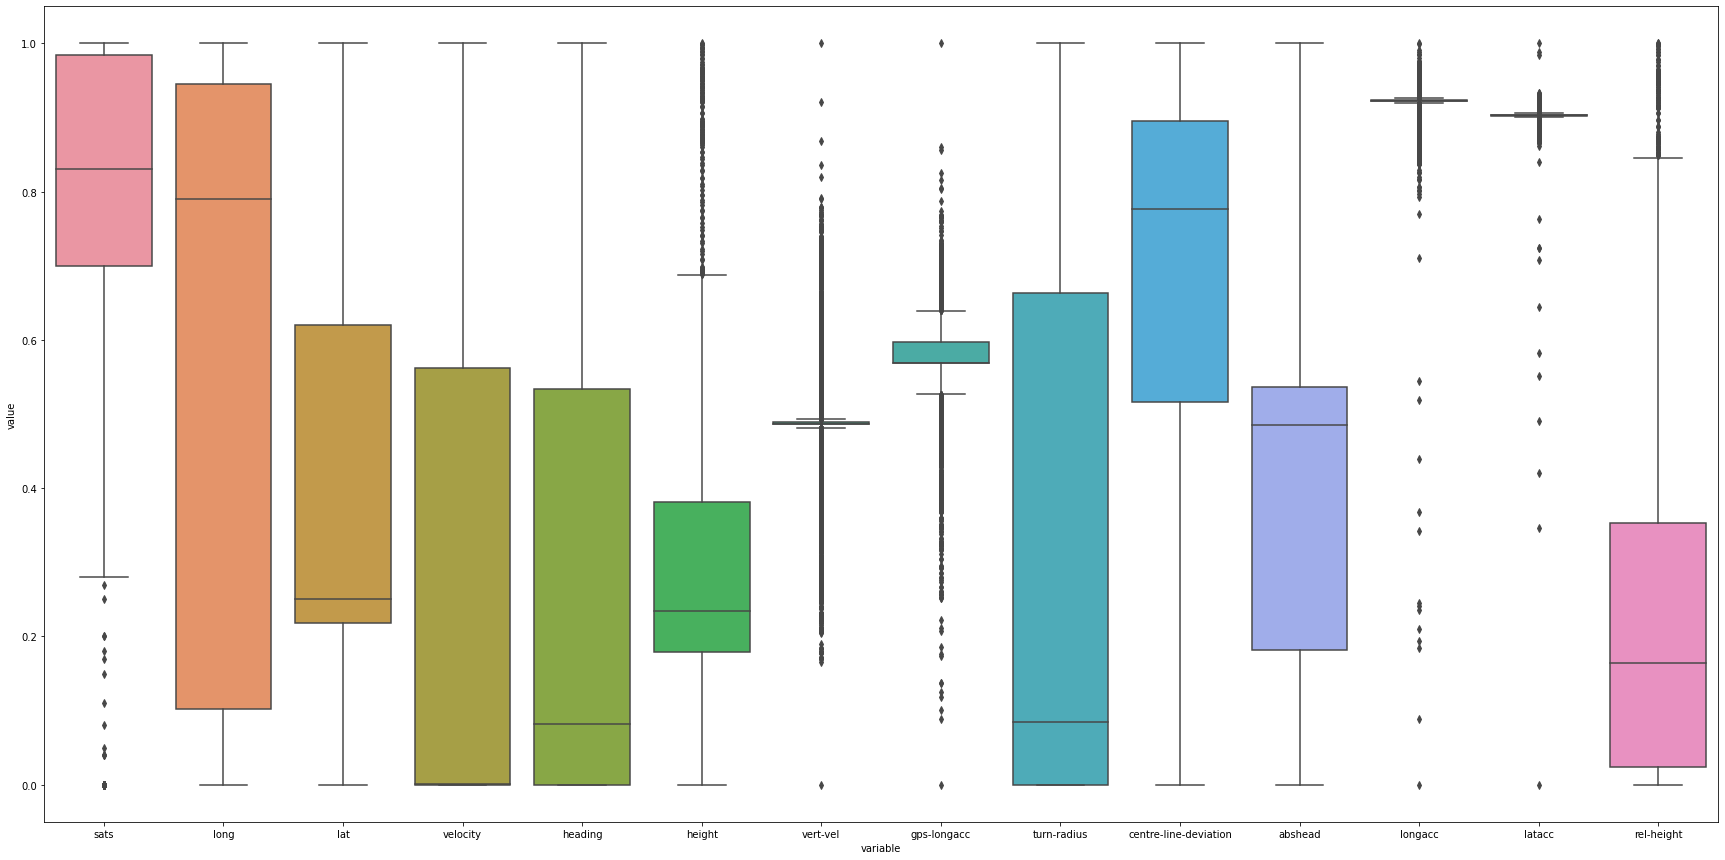

In [31]:
df_sub = scaled_df.drop(['time'],axis=1)
plt.figure(figsize=(30, 15))
sns.boxplot(x="variable", y="value", data=pd.melt(df_sub))
plt.savefig('combine_boxplot_of-Scaled-Data_without_time.jpg')

plt.show()

In [30]:
correlation_data = scaled_df.corr()
correlation_data.to_csv("correlation_data.csv")

In [33]:
import hvplot.pandas  # noqa
scaled_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [36]:
df.hvplot(x='time', y=['sats', 'long', 'lat', 'velocity', 'heading', 'height',
       'vert-vel', 'gps-longacc', 'turn-radius', 'centre-line-deviation',
       'abshead', 'longacc', 'latacc', 'rel-height'],
             value_label='Rate (per 100k people)')

:NdOverlay   [Variable]
   :Curve   [time]   (Rate (per 100k people))

In [42]:
columns =['sats', 'long', 'lat', 'velocity', 'heading', 'height',
       'vert-vel', 'gps-longacc', 'turn-radius', 'centre-line-deviation',
       'abshead', 'longacc', 'latacc', 'rel-height']
scaled_df.hvplot.hist(y=columns, bins=50, alpha=0.5, legend='top', height=500)

:NdOverlay   [Element]
   :Histogram   [rel-height]   (rel-height_count)

In [46]:
scaled_df.hvplot.kde(y=columns, alpha=0.5, value_label='Rate', legend='top_left',height=600)

:NdOverlay   [Variable]
   :Distribution   [Rate]   (Density)

In [50]:
scaled_df.hvplot.box(y=columns, group_label='Crime', legend=False, value_label='Units', invert=True,height=600)

:BoxWhisker   [Crime]   (Units)

In [51]:
df.hvplot(x='time', y='velocity') * df.hvplot.scatter(x='time', y='velocity', c='k')

:Overlay
   .Curve.I   :Curve   [time]   (velocity)
   .Scatter.I :Scatter   [time]   (velocity)

In [52]:
df.hvplot.bivariate(x='time', y='velocity', width=600, height=500)

:Bivariate   [time,velocity]   (Density)

In [56]:
df.hvplot(x='long', y='lat') * df.hvplot.scatter(x='long', y='lat', c='k')
df.hvplot.bivariate(x='time', y='velocity', width=600, height=500)

:Bivariate   [time,velocity]   (Density)

In [ ]:
df.hvplot.scatter(x='long', y='lat', by='velocity', 
                  legend='top', height=400, width=400)

In [7]:
df.hvplot(x='time', y=['long', 'lat', 'velocity'], value_label='rate')

:NdOverlay   [Variable]
   :Curve   [time]   (rate)

In [1]:
# color_palette=sns.diverging_palette(10, 130, sep=100, n=10)

# scatter_data = pd.DataFrame({"x":df['time'],
#                             "y":df['velocity'],
#                              "score":df['height']
#                            }).T

# linear_data = pd.DataFrame({"x":df['time'],
#                             "y":df['velocity']
#                            })

# fg = sns.FacetGrid(data=scatter_data, hue='score', 
#                                       palette=color_palette, size=5, aspect=1.5)
# fg.map(plt.scatter, 'x', 'y').add_legend()
# fg.axes[0,0].plot(linear_data['x'], linear_data['y'], marker="o")
# plt.show()

In [8]:
df.head()

time  sats        long        lat  velocity  heading  height  vert-vel  \
0  71437.15   7.8  118.818825  31.892808       0.0      0.0  11.655       0.0   
1  71452.85   8.0  118.818825  31.892807       0.0      0.0  11.489       0.0   
2  71453.85   8.0  118.818825  31.892808       0.0      0.0  11.543       0.0   
3  71454.85   8.0  118.818825  31.892808       0.0      0.0  11.603       0.0   
4  71455.85   8.0  118.818825  31.892808       0.0      0.0  11.633       0.0   

   gps-longacc  turn-radius  centre-line-deviation  abshead  longacc  latacc  \
0          0.0          0.0                    0.0      0.0      0.0     0.0   
1          0.0          0.0                    0.0      0.0      0.0     0.0   
2          0.0          0.0                    0.0      0.0      0.0     0.0   
3          0.0          0.0                    0.0      0.0      0.0     0.0   
4          0.0          0.0                    0.0      0.0      0.0     0.0   

   rel-height  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

Text(0, 0.5, 'Throughput(mb/s)')

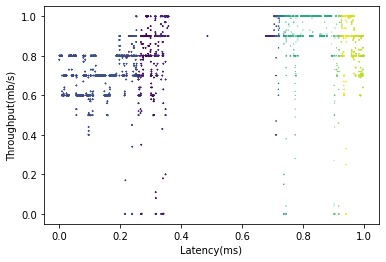

In [19]:
df_arr = np.asarray(scaled_array)
plt.scatter(df_arr[:, 0], df_arr[:, 1],df_arr[:, 2],df_arr[:, 3], marker = "x")
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')